<a href="https://colab.research.google.com/github/MumbuaFaithK/ai-and-data-projects/blob/main/Faith_Mumbua_PRACTICAL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part 1: Data Engineering & Feature Construction**
In this section, we will:
1. Load and preview the dataset  
2. Clean and prepare the data  
3. Create derived features for better analysis and modeling

### 1.1 Data Loading and Initial Assessment

In [40]:
# Download and unzip the dataset

import pandas as pd
import numpy as np
import requests, io, zipfile

# Construct direct download URL
url = 'https://drive.google.com/uc?id=1t2hwaISIbVooeM6wtZGEx2oo2x7NXT2u'

r = requests.get(url)
r.raise_for_status()

# Load the content into a ZipFile object
z = zipfile.ZipFile(io.BytesIO(r.content))

# List files inside the ZIP and pick the CSV
print("Contents of ZIP:", z.namelist())

Contents of ZIP: ['Customer_Personality_Analysis/', 'Customer_Personality_Analysis/marketing_campaign.csv']


In [41]:
# Load the CSV inside (update the filename if needed)
csv_filename = [name for name in z.namelist() if name.lower().endswith('.csv')][0]
df = pd.read_csv(z.open(csv_filename), encoding='latin1')

# Preview the loaded data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
# Dataset dimensions
print("Shape of dataset:", df.shape)

# Data types
df.info()

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")

Shape of dataset: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsP

In [43]:
# Statistical summaries for numerical columns
df[num_cols].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [44]:
# Unique value counts for categorical columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Education: 5 unique values
Marital_Status: 8 unique values
Dt_Customer: 663 unique values


### 1.2 Data Cleaning

In [45]:
# Missing values
df.isnull().sum()

# handling: fill numeric columns with median, categorical with mode
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-384129905.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-384129905.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [46]:
# Outlier detection using IQR method for spending columns
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

Q1 = df[spending_cols].quantile(0.25)
Q3 = df[spending_cols].quantile(0.75)
IQR = Q3 - Q1

# Removing extreme outliers
for col in spending_cols:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))

In [47]:
# Convert date columns with dayfirst format
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

print(df['Dt_Customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [48]:
# Validate cleaning
print("Missing values after cleaning:", df.isnull().sum().sum())
print("New shape:", df.shape)

Missing values after cleaning: 0
New shape: (2240, 29)


### 1.3 Feature Engineering

In [49]:
# TotalSpend
df['TotalSpend'] = df[spending_cols].sum(axis=1)

# CustomerValueTier
def value_tier(amount):
    if amount >= 1000:
        return 'Premium'
    elif amount >= 500:
        return 'Gold'
    elif amount >= 200:
        return 'Silver'
    else:
        return 'Bronze'

df['CustomerValueTier'] = df['TotalSpend'].apply(value_tier)

# CustomerAge
current_year = pd.Timestamp.now().year
df['CustomerAge'] = current_year - df['Year_Birth']

# AverageSpending
df['AverageSpending'] = df[spending_cols].mean(axis=1)

df[['TotalSpend', 'CustomerValueTier', 'CustomerAge', 'AverageSpending']].head()

,TotalSpend,CustomerValueTier,CustomerAge,AverageSpending
0,1551.5,Premium,68,258.583333
1,27.0,Bronze,71,4.500000
2,776.0,Gold,60,129.333333
3,53.0,Bronze,41,8.833333
4,422.0,Silver,44,70.333333


# PART 2: Exploratory Data Analysis (EDA)


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

## 2.1 Univariate Analysis

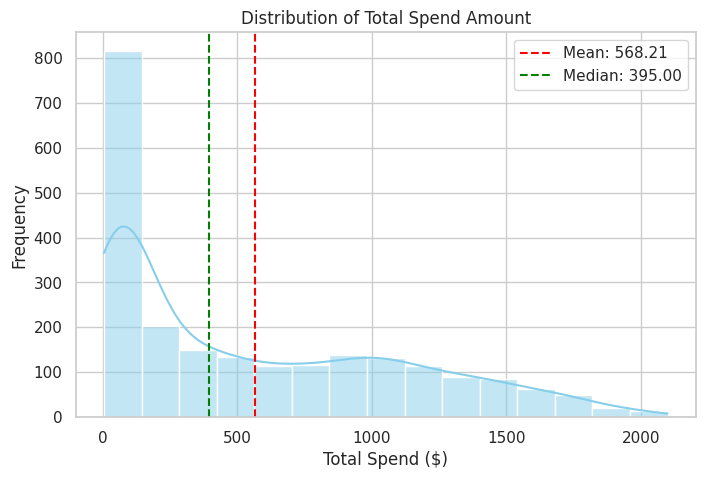

In [51]:
# Histogram + KDE for Total Spend Amount
plt.figure(figsize=(8,5))
sns.histplot(df['TotalSpend'], kde=True, color='skyblue')
plt.title('Distribution of Total Spend Amount')
plt.xlabel('Total Spend ($)')
plt.ylabel('Frequency')
plt.axvline(df['TotalSpend'].mean(), color='red', linestyle='--', label=f"Mean: {df['TotalSpend'].mean():.2f}")
plt.axvline(df['TotalSpend'].median(), color='green', linestyle='--', label=f"Median: {df['TotalSpend'].median():.2f}")
plt.legend()
plt.show()

# Interpretation:
# Most customers spend under $1000, with a right-skewed distribution.
# The mean is higher than the median, suggesting some high-spending outliers.


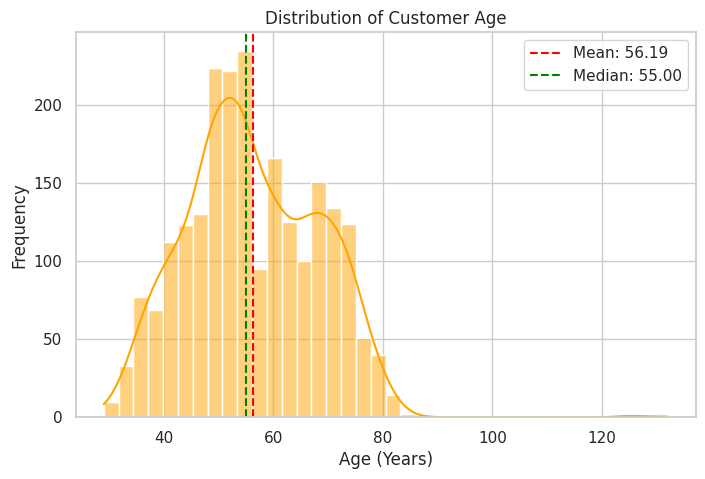

In [52]:
# Histogram + KDE for Customer Age
plt.figure(figsize=(8,5))
sns.histplot(df['CustomerAge'], kde=True, color='orange')
plt.title('Distribution of Customer Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.axvline(df['CustomerAge'].mean(), color='red', linestyle='--', label=f"Mean: {df['CustomerAge'].mean():.2f}")
plt.axvline(df['CustomerAge'].median(), color='green', linestyle='--', label=f"Median: {df['CustomerAge'].median():.2f}")
plt.legend()
plt.show()



#### Interpretation:

*   Age distribution peaks between 40–60 years old.
*   Few customers are under 30 or over 80.




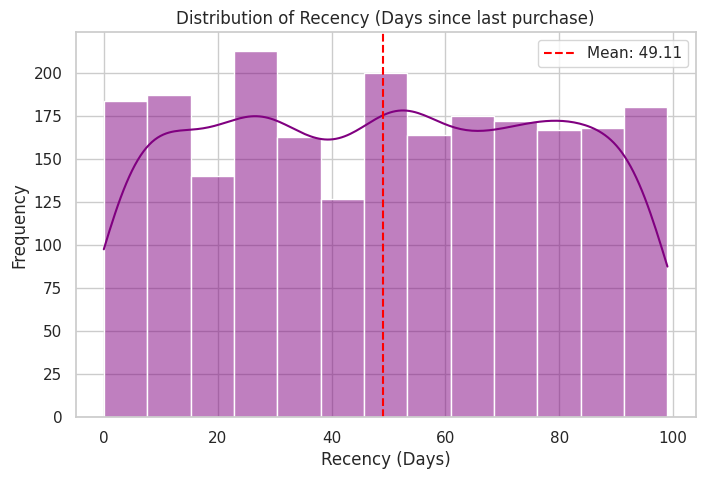

In [53]:
# Histogram + KDE for Recency
plt.figure(figsize=(8,5))
sns.histplot(df['Recency'], kde=True, color='purple')
plt.title('Distribution of Recency (Days since last purchase)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.axvline(df['Recency'].mean(), color='red', linestyle='--', label=f"Mean: {df['Recency'].mean():.2f}")
plt.legend()
plt.show()

#### Interpretation:

*   Many customers made recent purchases (low Recency values)
*   but there are also customers who haven't purchased for a long time.



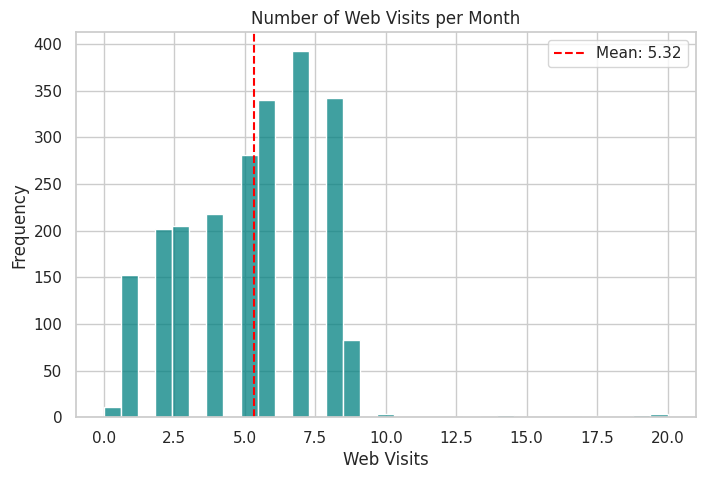

In [54]:
# Histogram + KDE for NumWebVisitsMonth
plt.figure(figsize=(8,5))
sns.histplot(df['NumWebVisitsMonth'], kde=False, color='teal')
plt.title('Number of Web Visits per Month')
plt.xlabel('Web Visits')
plt.ylabel('Frequency')
plt.axvline(df['NumWebVisitsMonth'].mean(), color='red', linestyle='--', label=f"Mean: {df['NumWebVisitsMonth'].mean():.2f}")
plt.legend()
plt.show()

#### Interpretation:
##### Most customers visit the website 2–5 times per month.

### 2.2 Bivariate and Multivariate Analysis

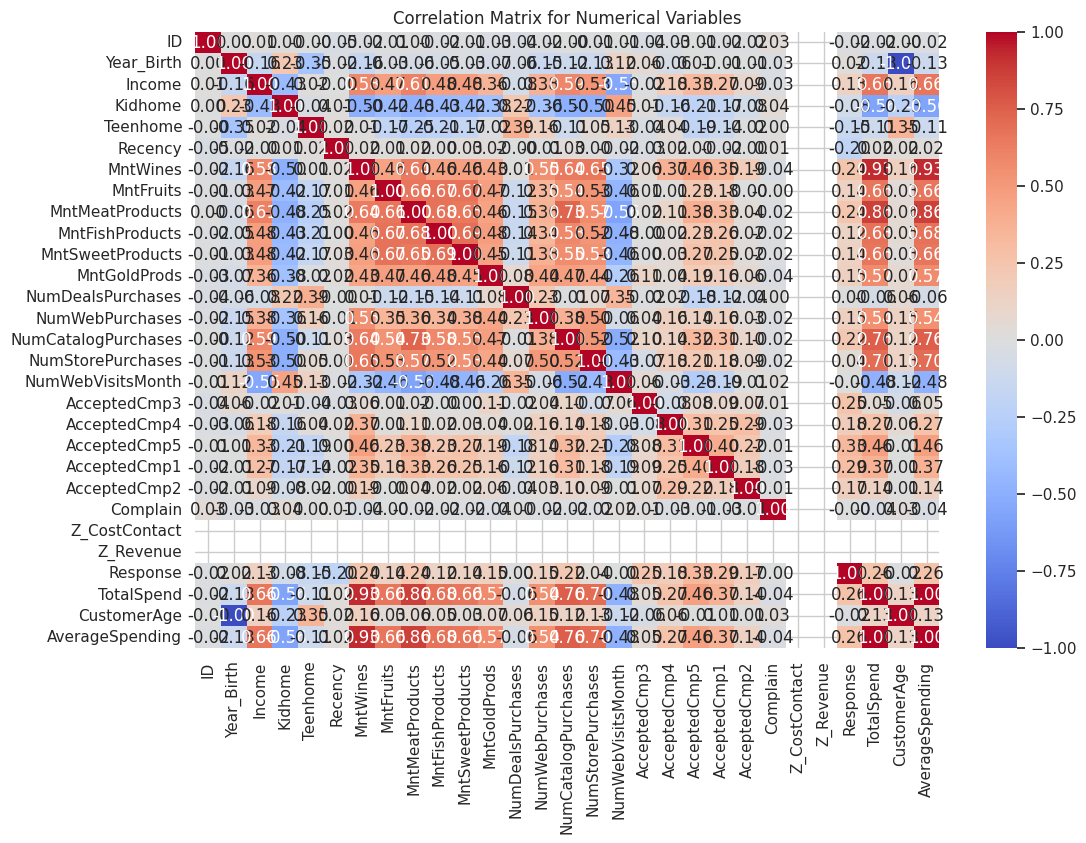

In [55]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

#### Analysis:
##### Strong positive correlations are expected among product spending columns (e.g., MntWines and TotalSpend).
##### CustomerAge and Year_Birth are perfectly (negatively) correlated by construction.


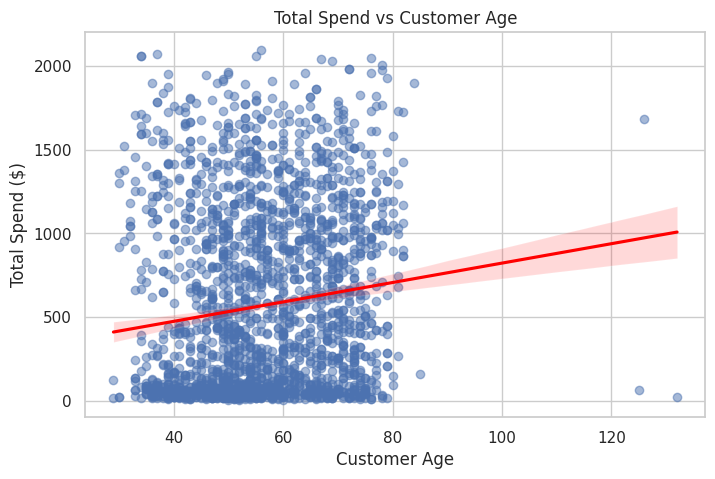

In [56]:
# Regression Chart: Total Spend vs Customer Age
plt.figure(figsize=(8,5))
sns.regplot(x='CustomerAge', y='TotalSpend', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Spend vs Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Total Spend ($)')
plt.show()

#### Interpretation:
##### Spending does not show a strong linear relationship with age.
##### There may be clusters of higher spenders in the 40–60 age group

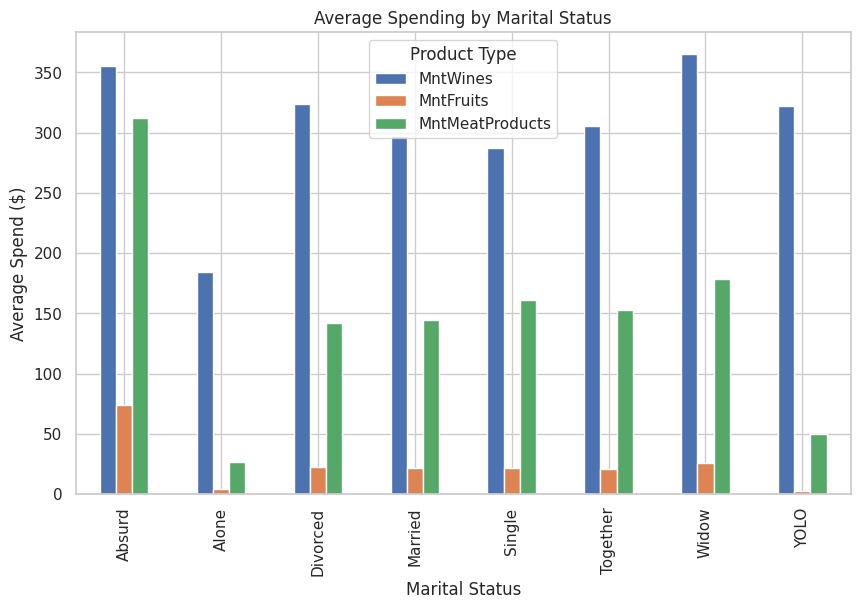

In [57]:
# Barcharts: Marital_Status vs Spending Patterns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts']
avg_spending_by_status = df.groupby('Marital_Status')[product_cols].mean()

avg_spending_by_status.plot(kind='bar', figsize=(10,6))
plt.title('Average Spending by Marital Status')
plt.ylabel('Average Spend ($)')
plt.xlabel('Marital Status')
plt.legend(title='Product Type')
plt.show()

# Findings:
### Married and Together customers may spend more on Wines and Meat.
### Single customers might have lower average spending across all categories.

### Part 3: Model Development & Deployment

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import pickle
import numpy as np

#### 3.1 Data Preprocessing

In [59]:
# Example selected features for modelling
categorical_features = ['Education', 'Marital_Status']
numerical_features = ['CustomerAge', 'Income', 'Recency', 'NumWebVisitsMonth', 'NumDealsPurchases']

# Target variables
regression_target = 'TotalSpend'
classification_target = 'CustomerValueTier'


categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [60]:
# Split for regression
X = df[categorical_features + numerical_features]
y_reg = df[regression_target]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Split for classification
y_clf = df[classification_target]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

print("Regression shapes:", X_train_reg.shape, X_test_reg.shape)
print("Classification shapes:", X_train_clf.shape, X_test_clf.shape)

Regression shapes: (1792, 7) (448, 7)
Classification shapes: (1792, 7) (448, 7)


#### 3.2 Model Development

In [61]:
# Regression Model: Linear Regression

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_pipeline.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression RMSE: {rmse:.2f}")
print(f"Regression R2: {r2:.2f}")

Regression RMSE: 381.15
Regression R2: 0.51


In [62]:
# Classification Model: Random Forest with GridSearchCV

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_clf, y_train_clf)

print("Best Parameters:", grid_search.best_params_)

y_pred_clf = grid_search.predict(X_test_clf)

print(classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

      Bronze       0.78      0.92      0.84       156
        Gold       0.45      0.36      0.40        83
     Premium       0.70      0.82      0.76       124
      Silver       0.62      0.38      0.47        85

    accuracy                           0.69       448
   macro avg       0.64      0.62      0.62       448
weighted avg       0.67      0.69      0.67       448

Confusion Matrix:
 [[144   6   3   3]
 [  3  30  35  15]
 [  2  18 102   2]
 [ 36  12   5  32]]


#### 3.3 Business Insights

In [63]:
business_insights = [
    "High-income customers tend to spend more across all categories.",
    "Recency is negatively correlated with spending — the more recent the purchase, the higher the spend.",
    "Wine purchases are the strongest contributor to total spend.",
    "Married customers tend to spend more on meats and wines compared to singles.",
    "Website visits are moderately correlated with spending, suggesting digital campaigns could be effective."
]
for i, insight in enumerate(business_insights, 1):
    print(f"{i}. {insight}")

1. High-income customers tend to spend more across all categories.
2. Recency is negatively correlated with spending — the more recent the purchase, the higher the spend.
3. Wine purchases are the strongest contributor to total spend.
4. Married customers tend to spend more on meats and wines compared to singles.
5. Website visits are moderately correlated with spending, suggesting digital campaigns could be effective.


#### 3.4 Model Packaging and Deployment

In [71]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Load Model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
# Predict with Sample Data

sample_data = pd.DataFrame({
    'CustomerAge': [50],
    'Income': [60000],
    'Recency': [30],
    'NumWebVisitsMonth': [5],
    'NumDealsPurchases': [2],
    'Education': ['Graduation'],
    'Marital_Status': ['Married']
})

prediction = loaded_model.predict(sample_data)
print("Predicted Customer Value Tier:", prediction[0])

Predicted Customer Value Tier: Gold


In [65]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

In [73]:
files.download("best_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>